In [2]:
#All the Lib
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
 

In [5]:
#Customer Data
data = pd.read_csv(r"Churn_bank.csv")
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
#just for checking the columns
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [8]:
#it show the values of surname column
data.Surname

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object

In [10]:
#categoris manually the numerical type data is separate variable name as num_data
num_data = data[['CreditScore','Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn']].replace('NAN',0).astype('float64')

In [11]:
#this is use after sometime
#concate the categarical and numerical type data into one variable for eassiness
num_data1 = pd.concat([num_data,data['CustomerId']],axis=1)
num_data1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churn', 'CustomerId'],
      dtype='object')

In [14]:
#checking the correlation between all-to-predictable 
rr = num_data.corr()
sorted_corrs = rr['Churn'].abs().sort_values(ascending = False)
sorted_corrs

Churn              1.000000
Age                0.285323
IsActiveMember     0.156128
Balance            0.118533
NumOfProducts      0.047820
CreditScore        0.027094
Tenure             0.014001
EstimatedSalary    0.012097
HasCrCard          0.007138
Name: Churn, dtype: float64

In [16]:
#if any column you want to delete this is code for that work
# num_data = num_data.drop(['LEFT_DAYS','LEFT_MONTHS','month1_call_amt','GTL_FACTOR'],axis=1)

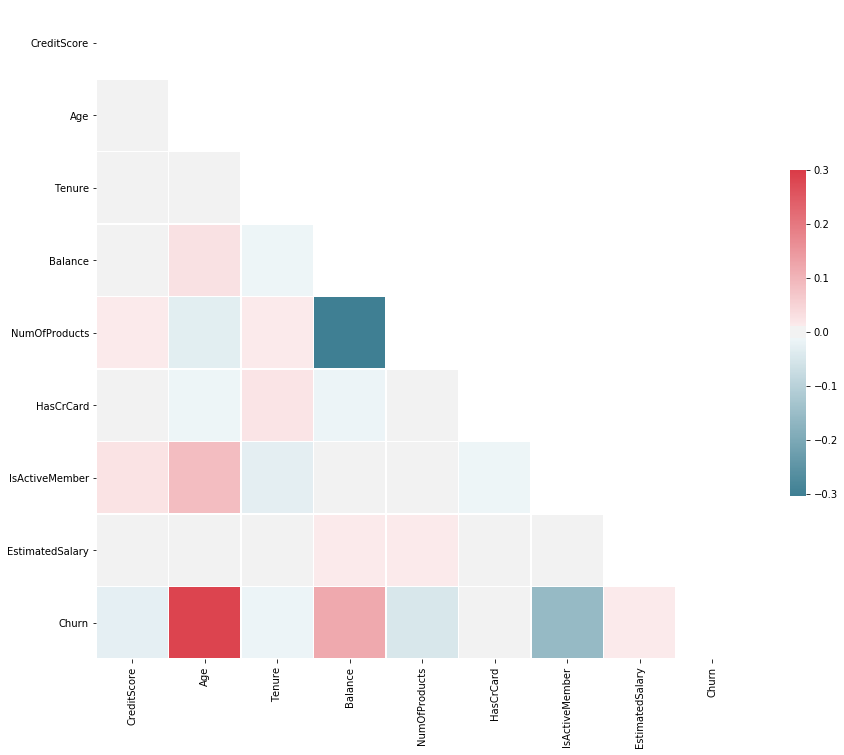

In [17]:
#for showing the data into heatmap
mask = np.triu(np.ones_like(rr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(rr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
#for seprating the categorical data attribute into diff variable
object_data = data[['Geography','Gender']]
#for converting the categorical non-numeric into numeric(0,1 from)
object_data = pd.get_dummies(object_data,dummy_na=True)

In [19]:
object_data

,Geography_France,Geography_Germany,Geography_Spain,Geography_nan,Gender_Female,Gender_Male,Gender_nan
0,1,0,0,0,1,0,0
1,0,0,1,0,1,0,0
2,1,0,0,0,1,0,0
3,1,0,0,0,1,0,0
4,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...
9995,1,0,0,0,0,1,0
9996,1,0,0,0,0,1,0
9997,1,0,0,0,1,0,0
9998,0,1,0,0,0,1,0


In [20]:
num_data1.shape

(10000, 10)

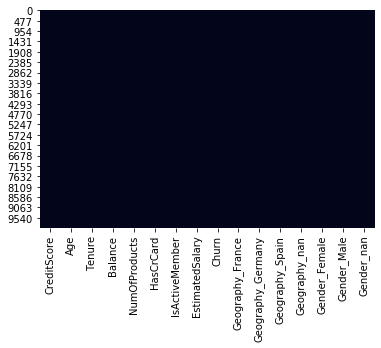

In [21]:
#numerical or categorical data concate and see, is any nan date present or not
post_ss = pd.concat([num_data,object_data],axis=1)
sns.heatmap(post_ss.isnull(), cbar=False)

In [22]:
#when everything is going fine now split the data into x and y for tain & test
#Churn is predicted variable
X = post_ss.drop(['Churn'],axis=1)
y = post_ss.Churn

In [23]:
#Train test Split .3 means 30% , 42 means full dataset me se 42-42 k chunk and remain 30% ko test k liye bacha dega
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [25]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Geography_nan,Gender_Female,Gender_Male,Gender_nan
6252,596.0,32.0,3.0,96709.07,2.0,0.0,0.0,41788.37,0,1,0,0,0,1,0
4684,623.0,43.0,1.0,0.00,2.0,1.0,1.0,146379.30,1,0,0,0,0,1,0
1731,601.0,44.0,4.0,0.00,2.0,1.0,0.0,58561.31,0,0,1,0,1,0,0
4742,506.0,59.0,8.0,119152.10,2.0,1.0,1.0,170679.74,0,1,0,0,0,1,0
4521,560.0,27.0,7.0,124995.98,1.0,1.0,1.0,114669.79,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8014,731.0,39.0,2.0,126816.18,1.0,1.0,1.0,74850.93,0,0,1,0,1,0,0
1074,535.0,31.0,7.0,111855.04,2.0,1.0,1.0,36278.89,1,0,0,0,1,0,0
3063,609.0,32.0,7.0,71872.19,1.0,1.0,1.0,151924.90,1,0,0,0,0,1,0
6487,580.0,31.0,2.0,0.00,2.0,0.0,1.0,64014.24,1,0,0,0,0,1,0


In [ ]:
# it is not run over here but this is the actual whole parameter of randomforest we hv to change the values for diff diff work
rf=RandomForestClassifier(n_estimators=200,max_depth=18,max_features='sqrt',min_samples_split =10
                                     ,min_samples_leaf=10,bootstrap=True,random_state=45)
                          #random_state=2) 

In [26]:
#here the algorithm runs here we use randomForest
#Model Building
rclf = RandomForestClassifier()
rclf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [29]:
#Accuracy Mesaure Model execution
#this is the last step where accuracy out come 
y_pred = rclf.predict(X_test)
print(len(X_test))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
y_pred = rclf.predict(X_test)

3000
0.8696666666666667
[[2341   75]
 [ 316  268]]
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      2416
         1.0       0.78      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.86      3000



In [31]:
import pickle 

In [32]:
# Save the trained model as a pickle string. 
Pkl_Filename = "RChurn_Pickle_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rclf, file)

In [46]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    RChurn_Pickle_Model = pickle.load(file)

RChurn_Pickle_Model




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
#Customer Data
data1 = pd.read_csv(r"Churn_bank.csv")
data1

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [40]:
num_data = data[['CreditScore','Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn']].replace('NAN',0).astype('float64')

In [41]:
object_data = data[['Geography','Gender']]
object_data = pd.get_dummies(object_data,dummy_na=True)

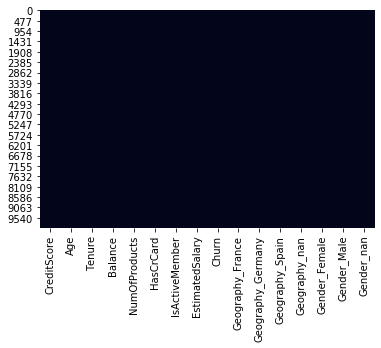

In [42]:
post_ss = pd.concat([num_data,object_data],axis=1)
sns.heatmap(post_ss.isnull(), cbar=False)

In [52]:
# although here we don't need of y bez we dont need predicted variable data over here
# bez just for checking and comparision perpose we use here y
X = post_ss.drop(['Churn'],axis=1)
y = post_ss.Churn

In [53]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Geography_nan,Gender_Female,Gender_Male,Gender_nan
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1,0,0,0,1,0,0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0,0,1,0,1,0,0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1,0,0,0,1,0,0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,1,0,0,0,1,0,0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,1,0,0,0,0,1,0
9996,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,1,0,0,0,0,1,0
9997,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1,0,0,0,1,0,0
9998,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,0,1,0,0,0,1,0


In [54]:
AB=RChurn_Pickle_Model.predict(X)

In [55]:
AB

array([0., 0., 1., ..., 1., 0., 0.])

In [56]:
result=pd.DataFrame(AB)

In [57]:
result

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
9995,0.0
9996,0.0
9997,1.0
9998,0.0


In [58]:
y #actual

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: Churn, Length: 10000, dtype: float64

In [60]:
#how we know the resultend output is upto 
#Accuracy Mesaure Model execution
print(accuracy_score(y,result))
print(confusion_matrix(y,result))
print(classification_report(y,result))
 

0.9609
[[7888   75]
 [ 316 1721]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      7963
         1.0       0.96      0.84      0.90      2037

    accuracy                           0.96     10000
   macro avg       0.96      0.92      0.94     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
seed=42
#rf=RandomForestClassifier()
#dt=DecisionTreeClassifier()
#rf=RandomForestClassifier(random_state=seed,n_estimators=80,class_weight={1:2},min_samples_leaf=10,max_depth=38,max_features='sqrt',bootstrap=True)       
#dt=DecisionTreeClassifier(random_state=seed,class_weight={1:2},min_samples_leaf=10,max_depth=23)
#rf = RandomForestClassifier(n_estimators=100,min_samples_split = 20,min_samples_leaf=10,max_features='sqrt',
 #                               max_depth=2,bootstrap=True,random_state=100)

#rf=RandomForestClassifier(n_estimators=500,max_depth=48,max_features='sqrt',min_samples_split =10
 #                                    ,min_samples_leaf=10,bootstrap=True,random_state=45)
                          #random_state=2)    

#dt=DecisionTreeClassifier(min_samples_split = 10,min_samples_leaf=10,max_features='sqrt',
 #                               max_depth=30,random_state=45)    

rf=RandomForestClassifier(n_estimators=200,max_depth=38,max_features='sqrt',min_samples_split =10
                                     ,min_samples_leaf=10,bootstrap=True,random_state=45)
                          #random_state=2)    

dt=DecisionTreeClassifier(min_samples_split = 20,min_samples_leaf=20,max_features='sqrt',
                                max_depth=46,random_state=45)
    
#rf=RandomForestClassifier(n_estimators=500,max_depth=58,max_features='sqrt',min_samples_split =30
 #                                    ,min_samples_leaf=30,bootstrap=True,criterion='entropy')
                          #random_state=2)    

#dt=DecisionTreeClassifier(min_samples_split = 32,min_samples_leaf=20,max_features='sqrt',
 #                               max_depth=48,criterion='entropy')
#rf=RandomForestClassifier(n_estimators=500,max_depth=2,max_features=30,min_samples_split =15
 #                                    ,min_samples_leaf=15,random_state=1)
#
#n_estimators=500,min_samples_split = 30,min_samples_leaf=10,max_features='sqrt',
 #                               max_depth=10,bootstrap=True,random_state=100)
lr=LogisticRegression(class_weight={1:60}, random_state=seed)
#lr=LogisticRegression(random_state=seed)

#sgd = SGDClassifier()

#svc=SVC(random_state=seed)

gbc=ensemble.GradientBoostingClassifier()

#rf=RandomForestClassifier(random_state=seed)
lr=LogisticRegression(random_state=seed)
#dt=DecisionTreeClassifier(random_state=seed)
sgd = SGDClassifier()
svc=SVC(random_state=seed)

#create a list of models
models=[rf,lr,dt]

def score_model(X_train,y_train,X_test,Y_test,X_val,y_val):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        y_val_pred=model.predict(X_val)
        
        #compute metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        valid_accuracy = model.score(X_val,y_val)
        
        p_score=metrics.precision_score(y_test,y_pred)
        p_val_score=metrics.precision_score(y_val,y_val_pred)
        r_score=metrics.recall_score(y_test,y_pred)
        r_val_score=metrics.precision_score(y_val,y_val_pred)
        f1_score=metrics.f1_score(y_test,y_pred)
        f1_val_score=metrics.f1_score(y_val,y_val_pred)
        fp, tp, th = metrics.roc_curve(y_test, y_pred)
        fpv, tpv, thv = metrics.roc_curve(y_val,y_val_pred)
        
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Precision"]=round(p_score,2)
        df.loc[i,"Recall"]=round(r_score,2)
        df.loc[i,"Train_Accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy,2)
        df.loc[i,"Validation_Accuracy"]=round(valid_accuracy,2)
        df.loc[i,"F1_Score"]=round(f1_score,2)
        df.loc[i,'AUC'] = metrics.auc(fp, tp)
        
     
    
        i+=1
    
    #sort values by accuracy
    df.sort_values(by=['F1_Score'],ascending=False,inplace=True)
    return(df)